# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import pandas as pd

model = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=20)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
df = pd.read_csv('..\\data\\data.csv')






# Definisco le variabili feature
features = ['wind_direction', 'concentration', 'U']
target = 'distance'
X = df[features]
# Definisco la variabile target
y = df[target]



In [ ]:
#Stampo la distribuzione delle classsi
print(y.value_counts())

distance
50     1081
100     963
200     792
Name: count, dtype: int64


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Faccio la cross-validation del modello
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

trained_model = model.fit(X_train, y_train)
# Predizioni sul test set
y_test_pred = trained_model.predict(X_test)
# Valuto le prestazioni del modello
accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", accuracy)
print("Classification report:\n", classification_report(y_test, y_test_pred))

Cross-validation scores: [0.96721311 0.86885246 0.93442623 0.89344262 0.90983607 0.8442623
 0.9338843  0.85950413 0.90909091 0.90909091]
Test set accuracy: 0.8947368421052632
Classification report:
               precision    recall  f1-score   support

          50       0.89      0.94      0.91       180
         200       0.91      0.82      0.86       124

    accuracy                           0.89       304
   macro avg       0.90      0.88      0.89       304
weighted avg       0.90      0.89      0.89       304



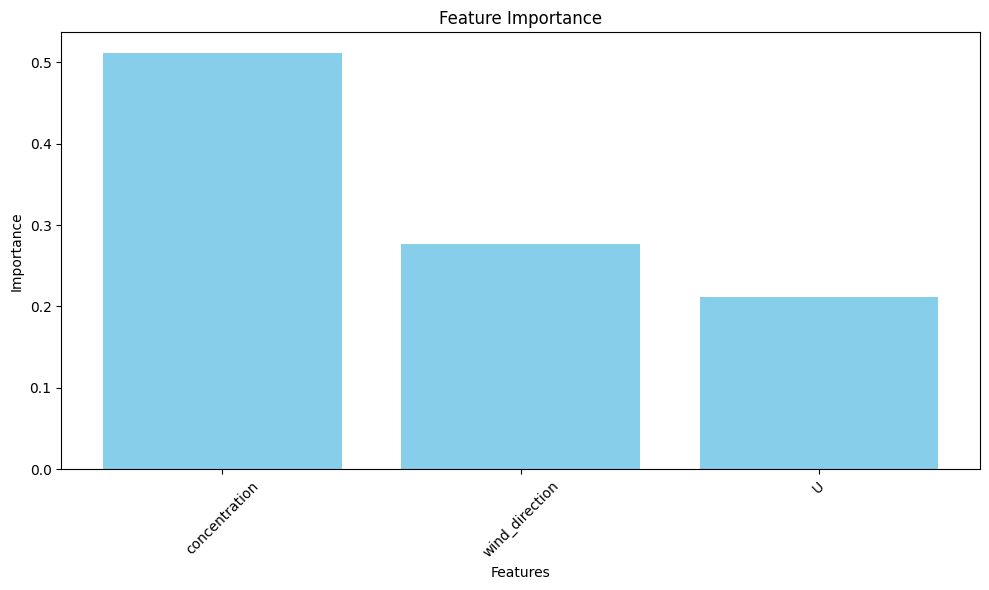

In [ ]:


# Feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': trained_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Plotto le feature importance
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Classification Report:")
print("Accuracy: ", accuracy_score(y_test, y_test_pred))


Classification Report:
Accuracy:  0.7147887323943662


In [ ]:
# Predizione su nuovi dati
def predict_distance( wind_direction, concentration, Wind_Speed):
    new_sample = pd.DataFrame([[ wind_direction, concentration, Wind_Speed]], columns=features)
    prediction = trained_model.predict(new_sample)[0]
    probabilities = trained_model.predict_proba(new_sample)[0]
    print(f"Predicted distance: {prediction} metri")
    print(f"Probabilities per classe:")
    for i, prob in enumerate(probabilities):
        print(f"Classe {i} m: {prob:.2f}")
    return prediction

In [ ]:
# Esempio di predizione
predict_distance( wind_direction=45, concentration=5, Wind_Speed=10)


Predicted distance: 100 metri
Probabilities per classe:
Classe 0 m: 0.44
Classe 1 m: 0.52
Classe 2 m: 0.04


np.int64(100)

In [56]:
# Ottimizzazione del modello
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

grid_search = GridSearchCV(estimator=trained_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score:  0.9086912342501016
